# **Импорт библиотек**

In [94]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import gdown
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Загрузка архива**

In [95]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download
import gdown

# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://drive.google.com/uc?id=1IfX-Zr33WpqsVqry3FLMMIr1Fegjxuy1', None, quiet=True)

'5900-6000-20231101T073500Z-001.zip'

# **Подготовка и разархивация данных**

In [96]:
!unzip -qo -x "5900-6000-20231101T073500Z-001.zip" -d /content/img


In [97]:
# Путь к папке, в которую будут сохранены изображения на Colab
save_folder_path = '/content/img'

# Создание папки для сохранения изображений на Colab
os.makedirs(save_folder_path, exist_ok=True)
IMAGE_PATH='/content/img'

In [98]:
# Путь к папке с изображениями
folder_path = '/content/img'

# Получение списка файлов в папке
file_list = os.listdir(folder_path)

# Сортировка списка файлов
file_list.sort()

# Переименование файлов
for i, file_name in enumerate(file_list):
    # Форматирование нового имени файла
    new_file_name = '{:03d}.jpeg'.format(i+1)

    # Полный путь к текущему файлу
    current_file_path = os.path.join(folder_path, file_name)

    # Полный путь к новому файлу
    new_file_path = os.path.join(folder_path, new_file_name)

    # Переименование файла
    os.rename(current_file_path, new_file_path)

In [99]:
# Получаем список файлов в директории
files1 = os.listdir(save_folder_path)
files1.sort()
# Составляем список путей к файлам
files_paths1 = [os.path.join(save_folder_path, file) for file in files1]
print(len(files_paths1))
files_paths1[0]

2


'/content/img/001.jpeg'

# **Чтение из файла**

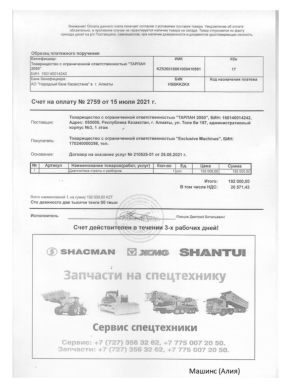

In [100]:

# Read the image
image = cv2.imread('/content/img/001.jpeg/5900.png', cv2.IMREAD_GRAYSCALE)

# Convert image data to float
image_float = image.astype(float)

# Display the image
plt.imshow(image_float, cmap='gray')
plt.axis('off')  # Optional: Remove axis
plt.show()




# **Получение контуров с помощью cv2.Canny**


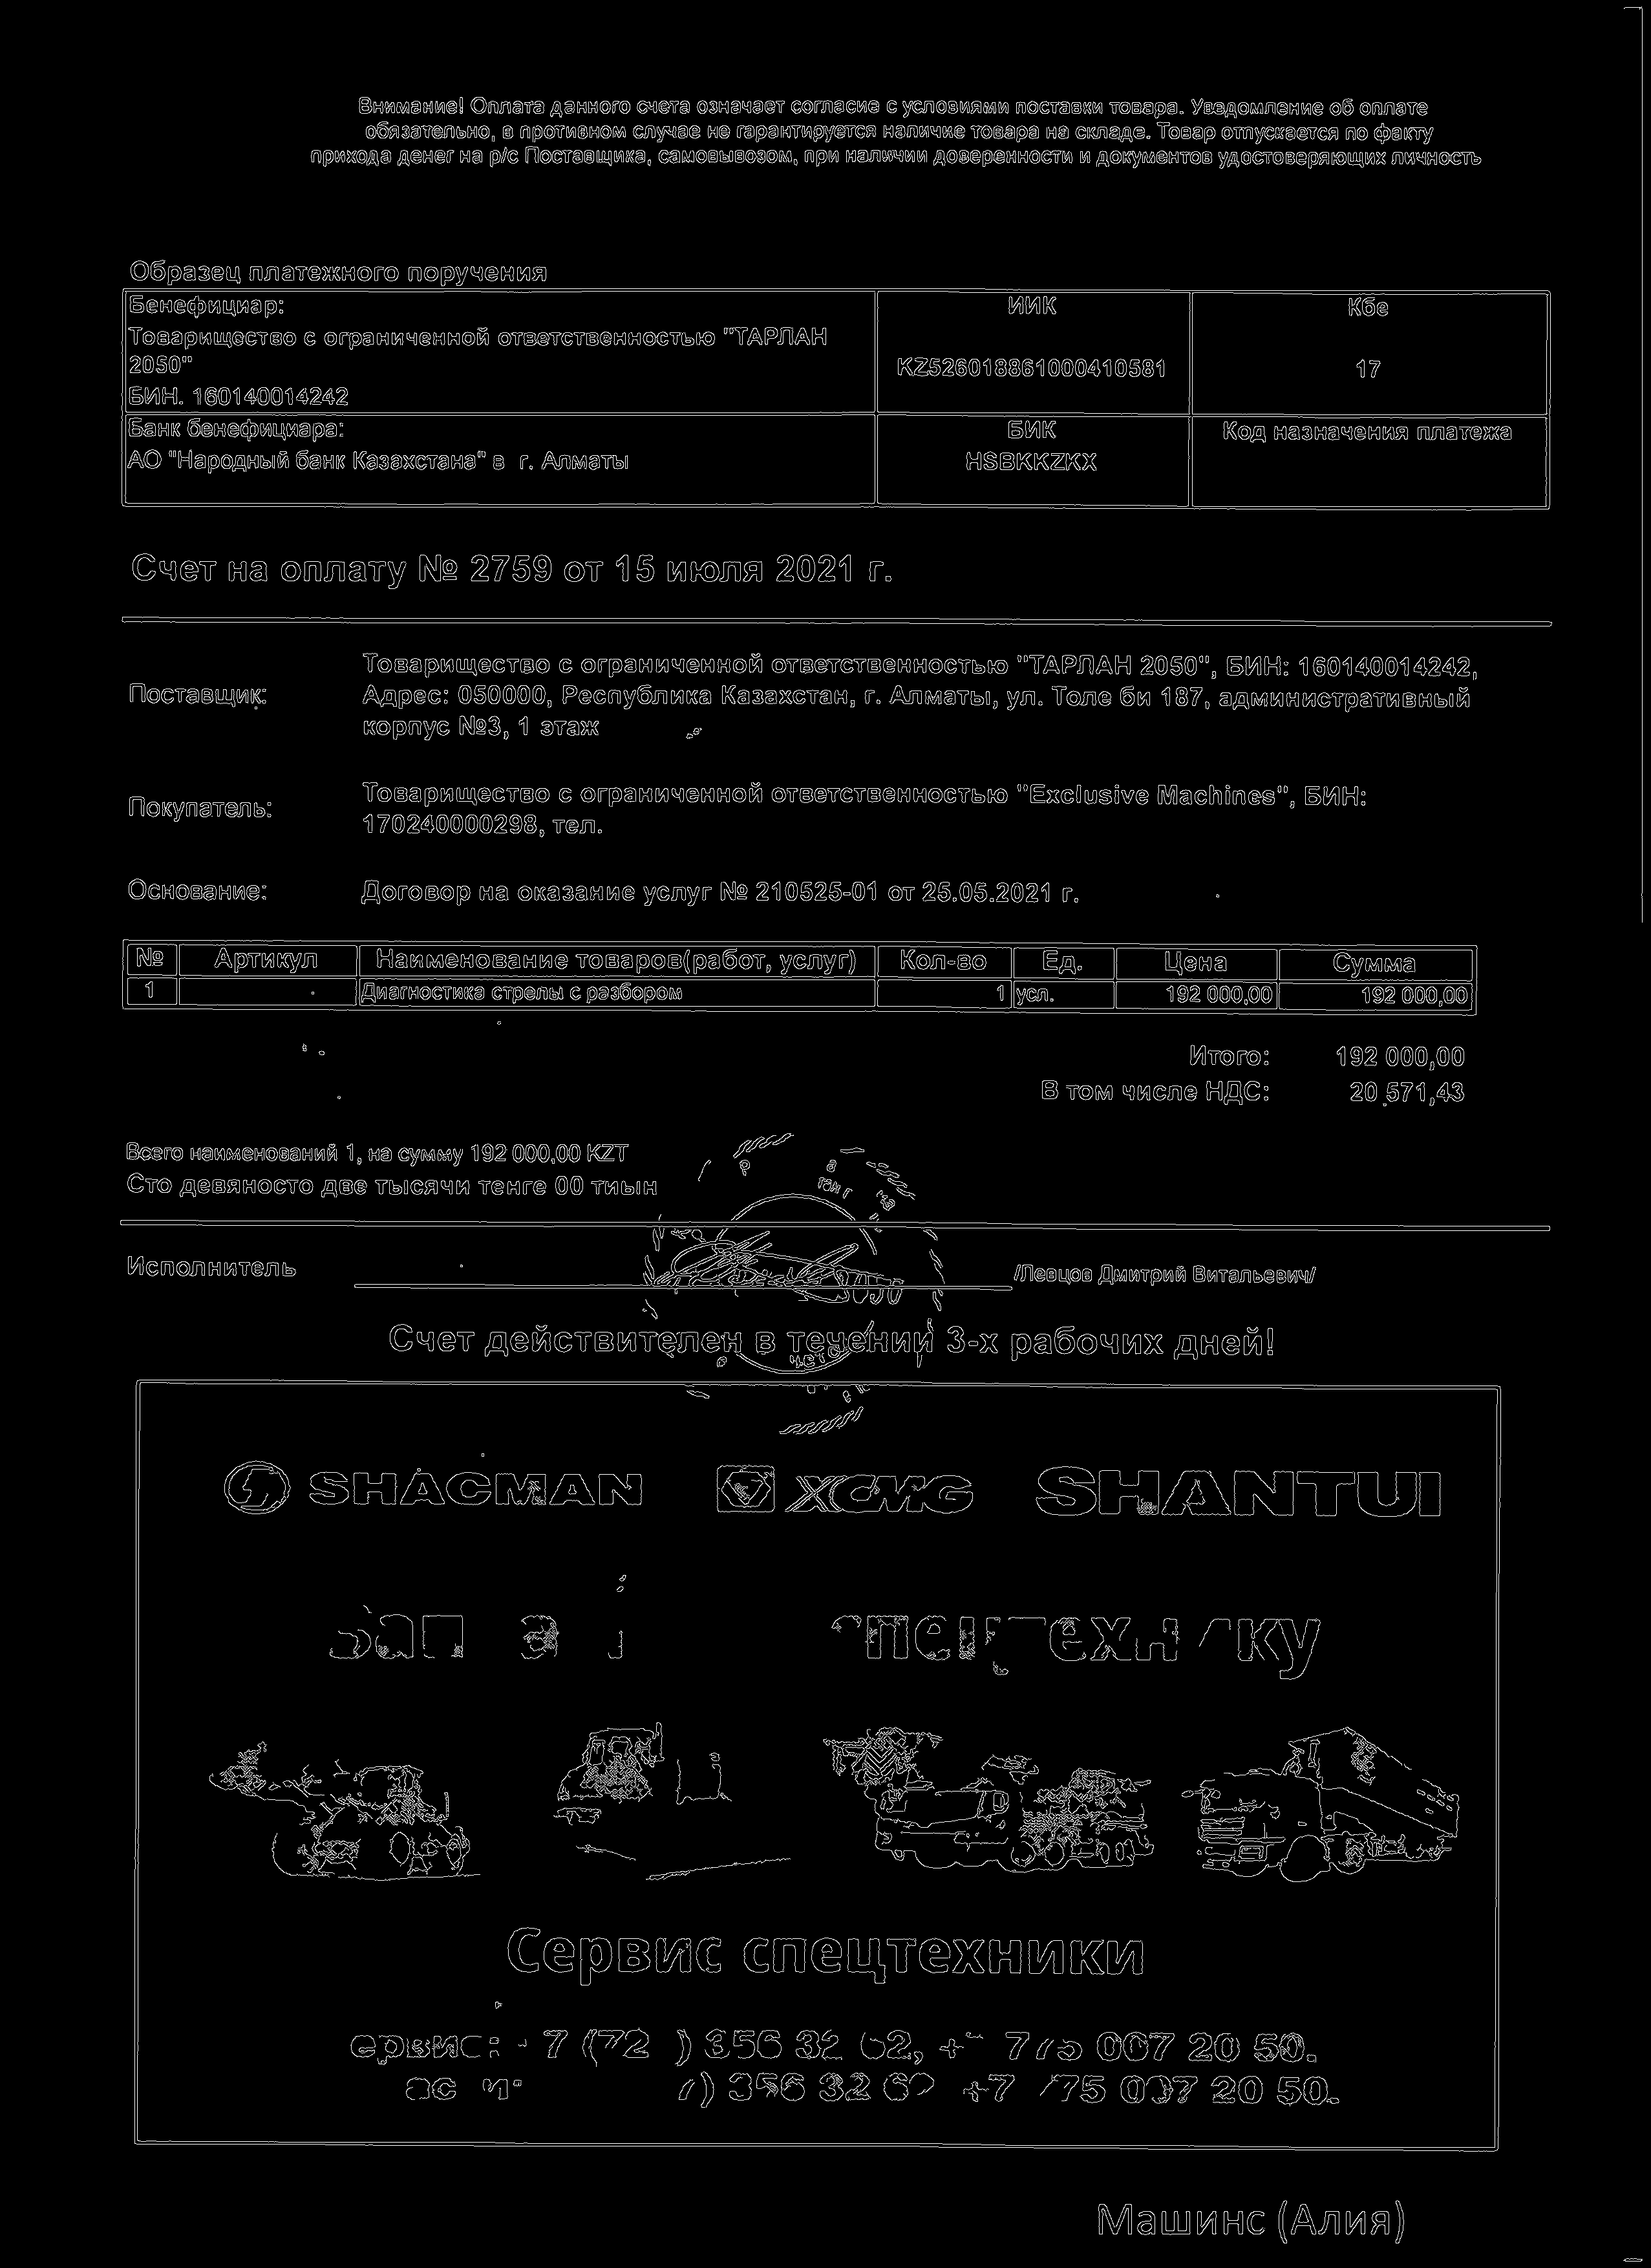

In [101]:
# получение контуров
edge = cv2.Canny(image, 50, 200, None, 3)

# вывод на экран
cv2_imshow(edge)

In [102]:
# поиск линий
linesP = cv2.HoughLinesP(image = edge,
                         rho = 1,
                         theta = np.pi / 180,
                         threshold = 50,
                         minLineLength =300,
                         maxLineGap =10)

linesP
len(linesP)

63

# **Erosion (эрозия) и dilation (расширение)**

In [103]:
# чтение изображения из файла
image = cv2.imread('/content/img/001.jpeg/5900.png', cv2.IMREAD_COLOR)

# вывод на экран исходного изображения
cv2_imshow(image)
print()

# задаем значение ядра
kernel = np.full((2, 2), 1, np.uint8)


# выполняем ЭРОЗИЮ
imageERO = cv2.erode(image, kernel)

# вывод на экран изображения после эрозии
cv2_imshow(imageERO)
print()


Output hidden; open in https://colab.research.google.com to view.

In [104]:
# выполняем РАСШИРЕНИЕ
imageDIL = cv2.dilate(image, kernel)

# вывод на экран изображения после расширения
cv2_imshow(imageDIL)

Output hidden; open in https://colab.research.google.com to view.

# **Пороговая обработка с помощью cv2.threshold()**

Исходное изображение


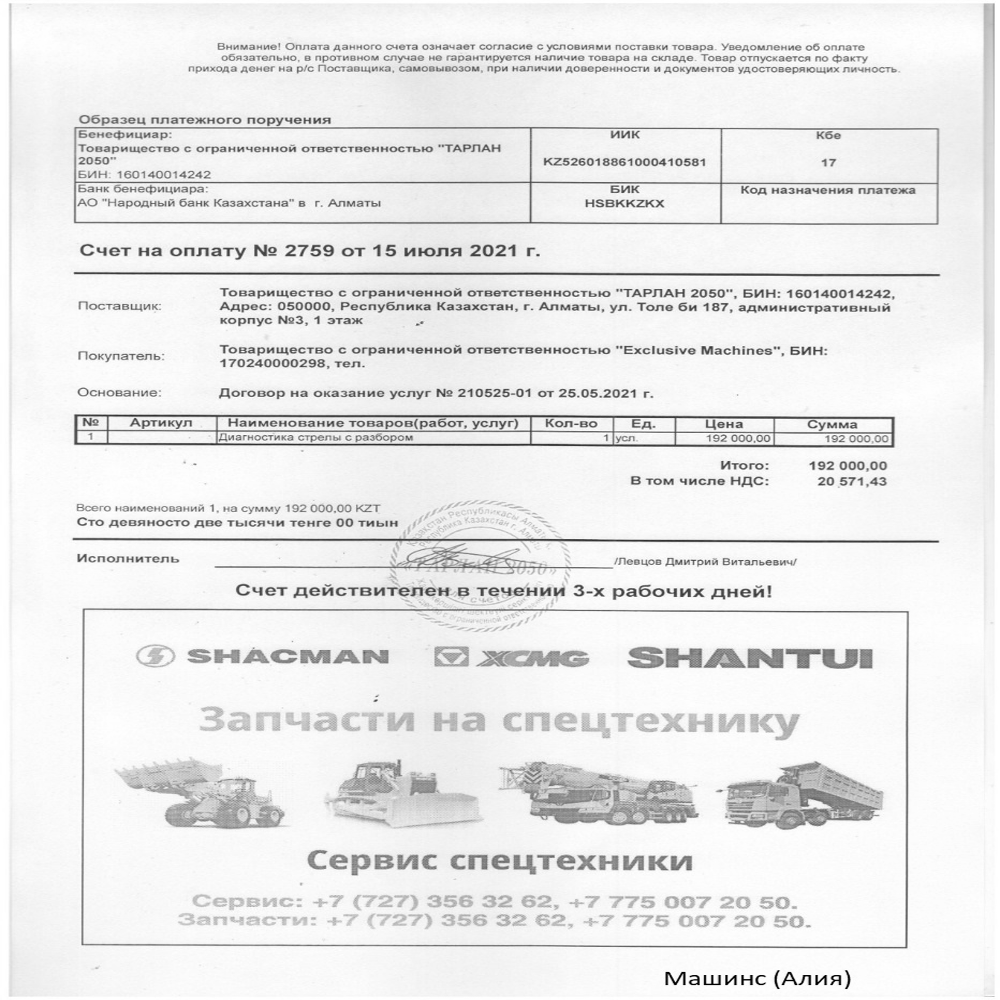

THRESH_BINARY


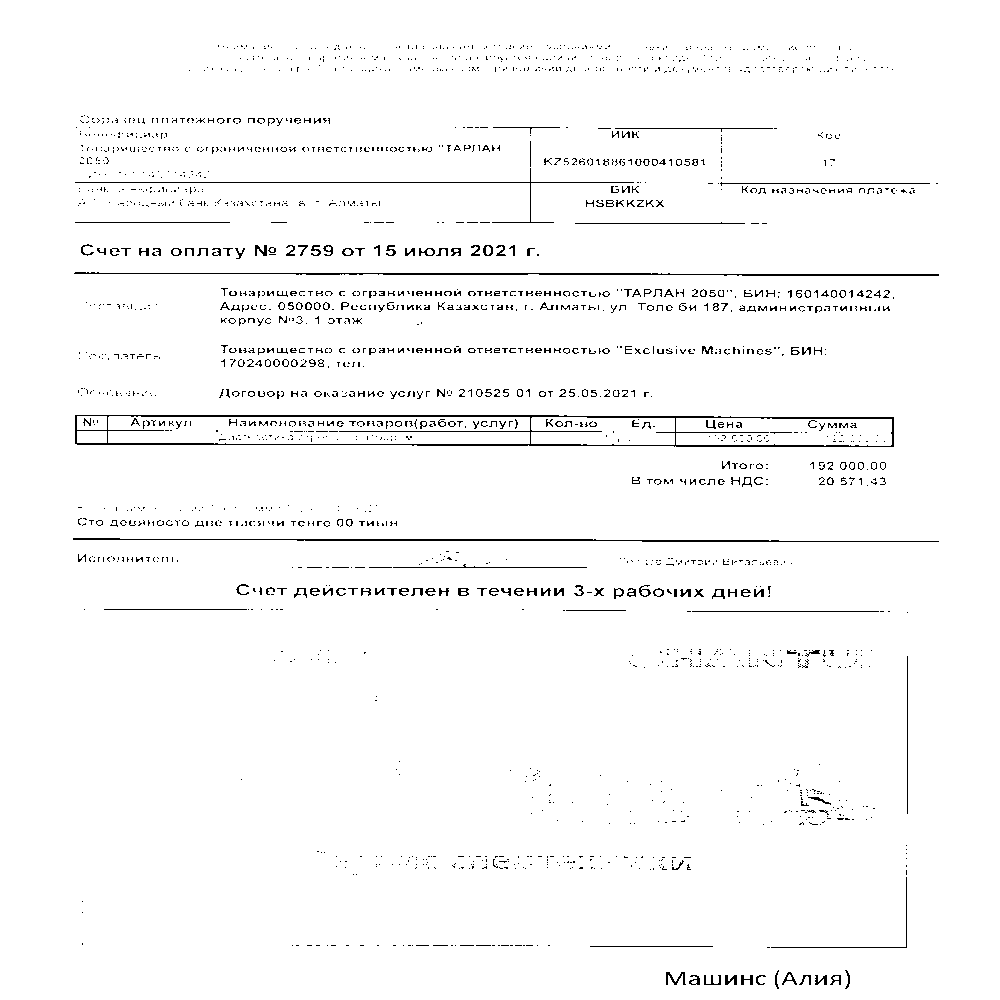

THRESH_BINARY_INV


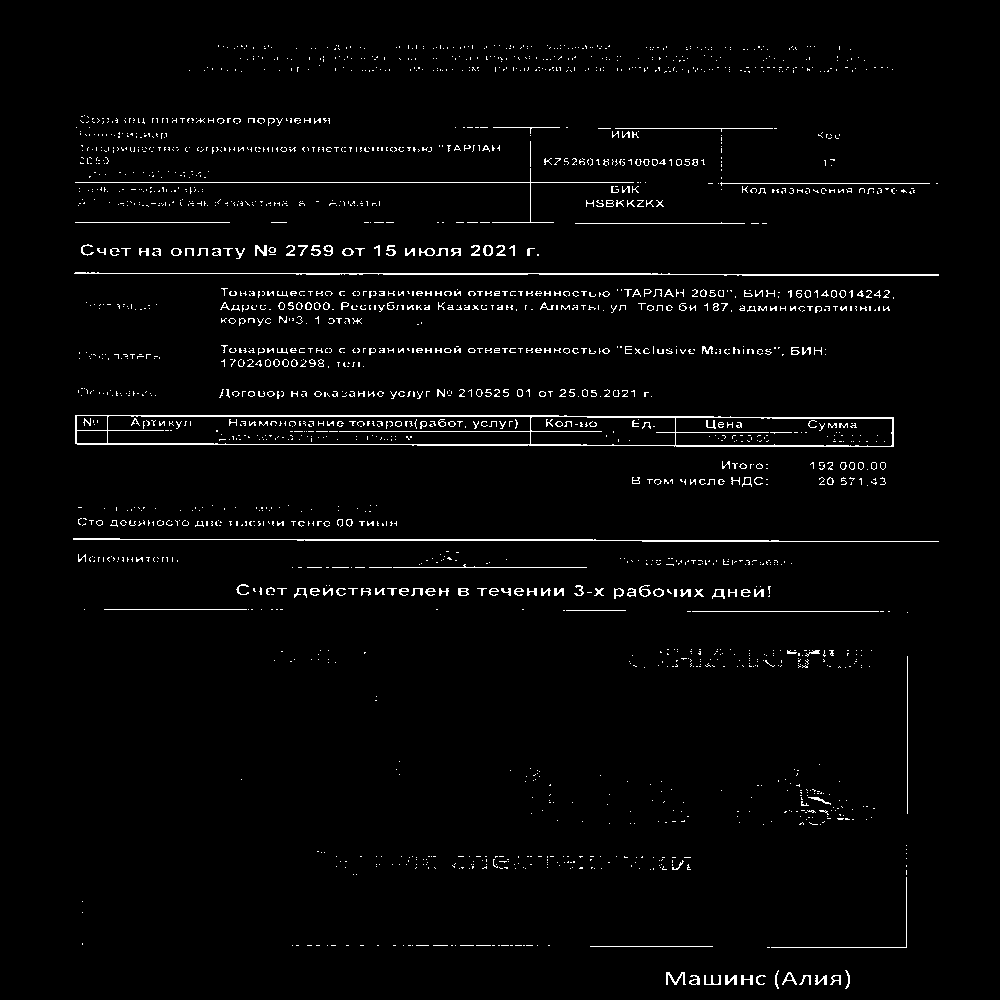

THRESH_TRUNC


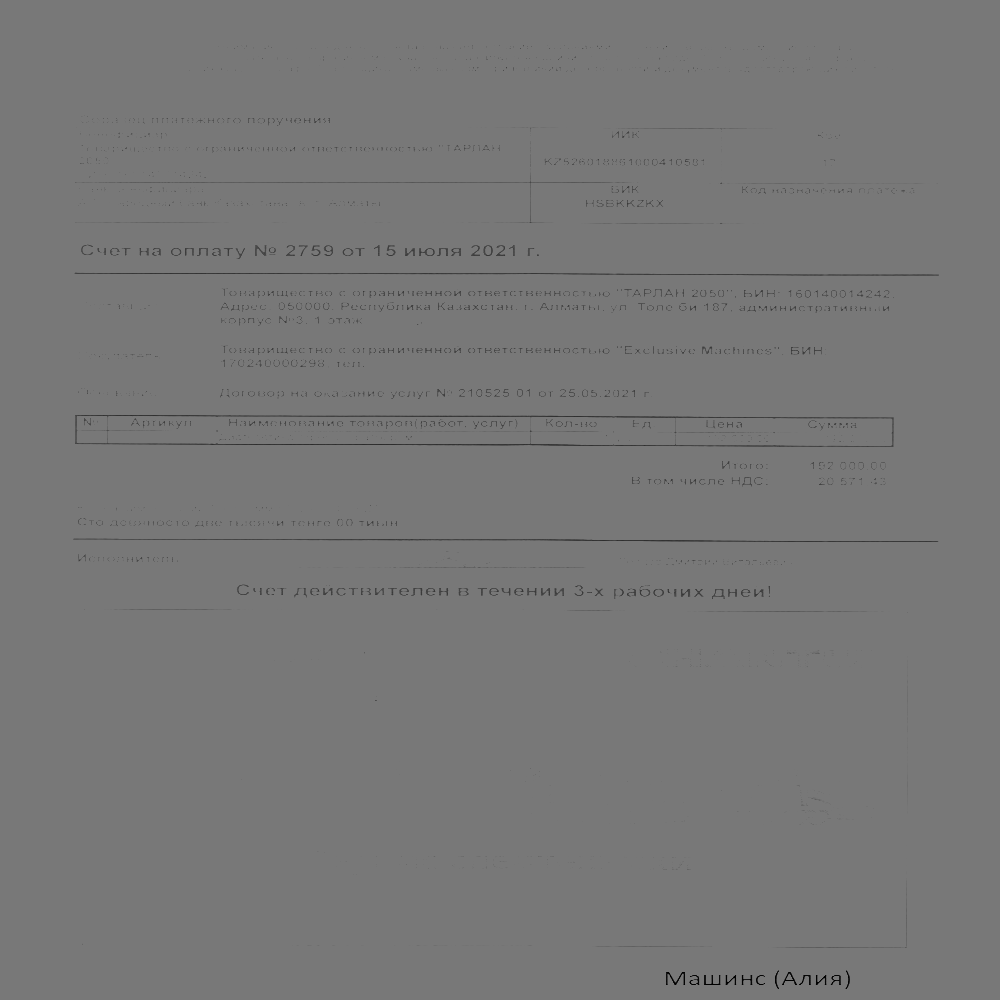

THRESH_TOZERO


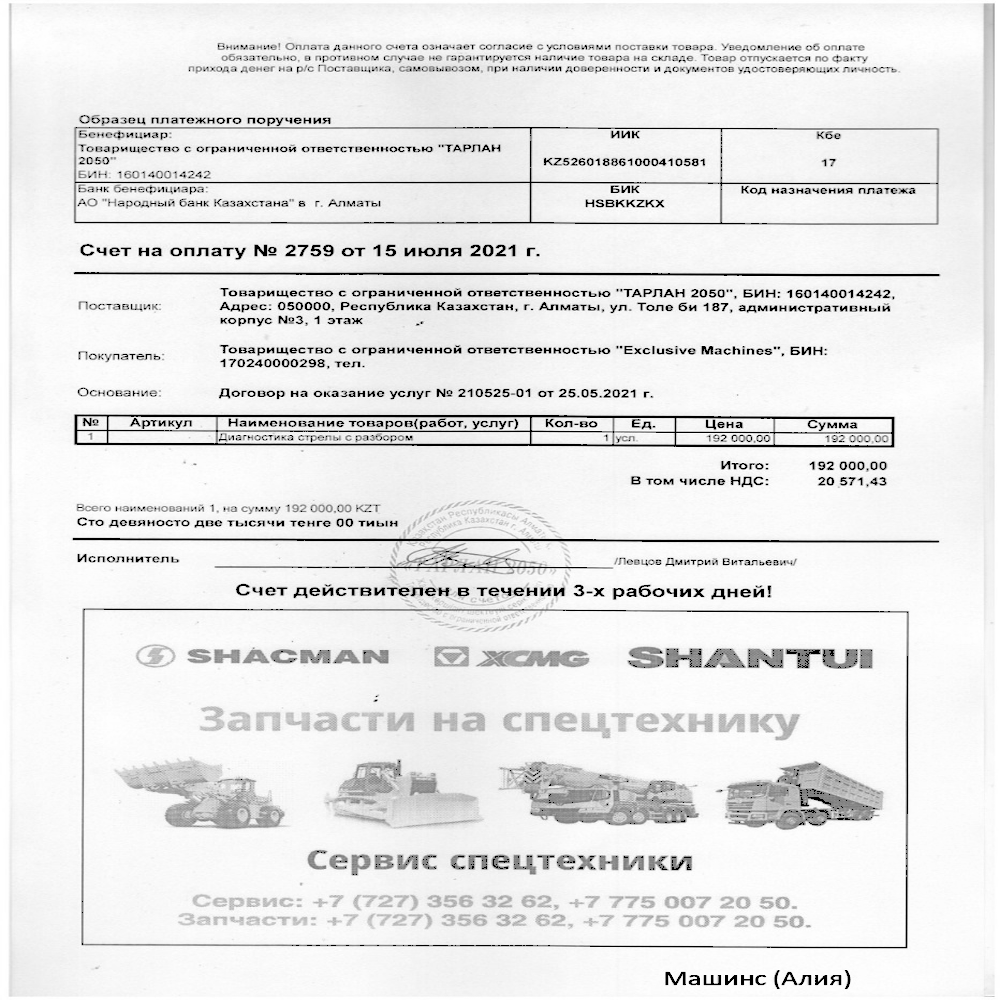

THRESH_TOZERO_INV


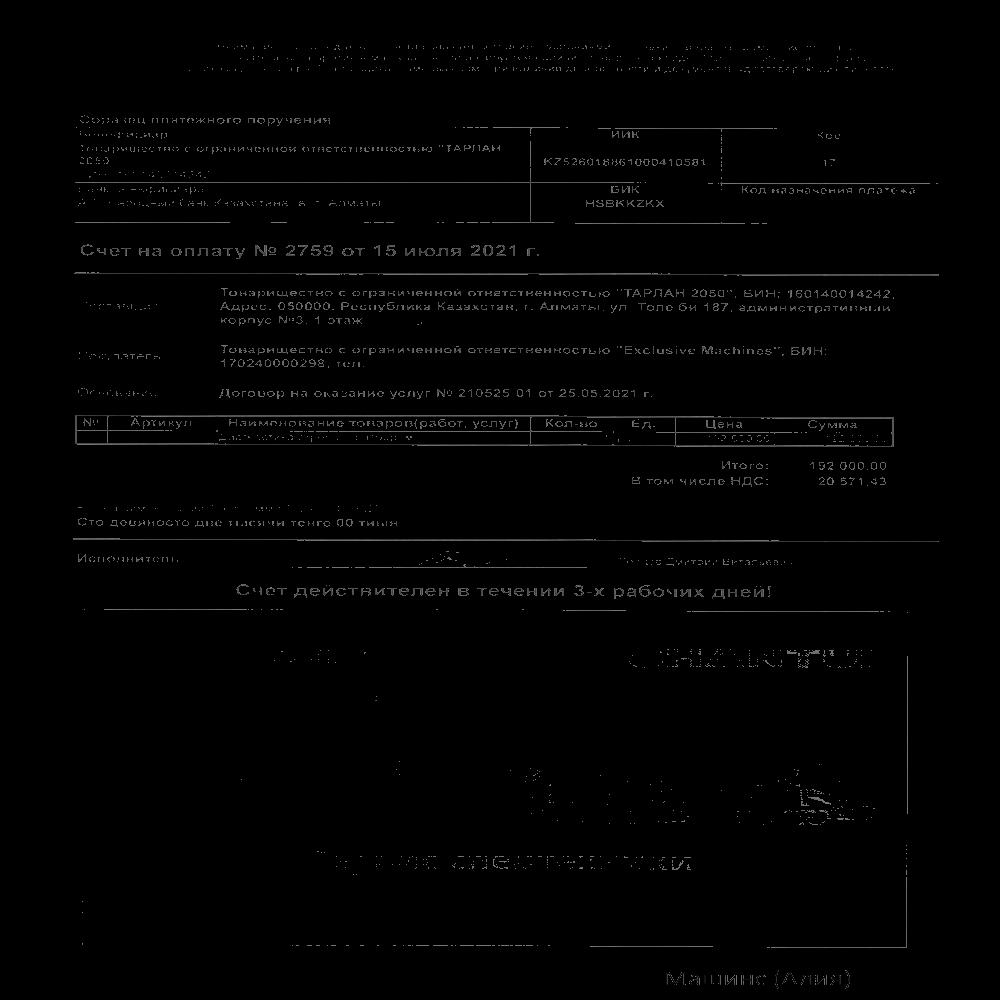

In [105]:

# чтение изображения из файла
image = cv2.imread('/content/img/001.jpeg/5900.png', cv2.IMREAD_GRAYSCALE)

# меняем размер
img = cv2.resize(image,(1000, 1000))

# вывод на экран исходного изображения
print('Исходное изображение')
cv2_imshow(img)

# применение порогов
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# вывод на экран
print('THRESH_BINARY')
cv2_imshow(thresh1)

print('THRESH_BINARY_INV')
cv2_imshow(thresh2)

print('THRESH_TRUNC')
cv2_imshow(thresh3)

print('THRESH_TOZERO')
cv2_imshow(thresh4)

print('THRESH_TOZERO_INV')
cv2_imshow(thresh5)

# **Обнаружение линий с помощью cv2.HoughLinesP()**

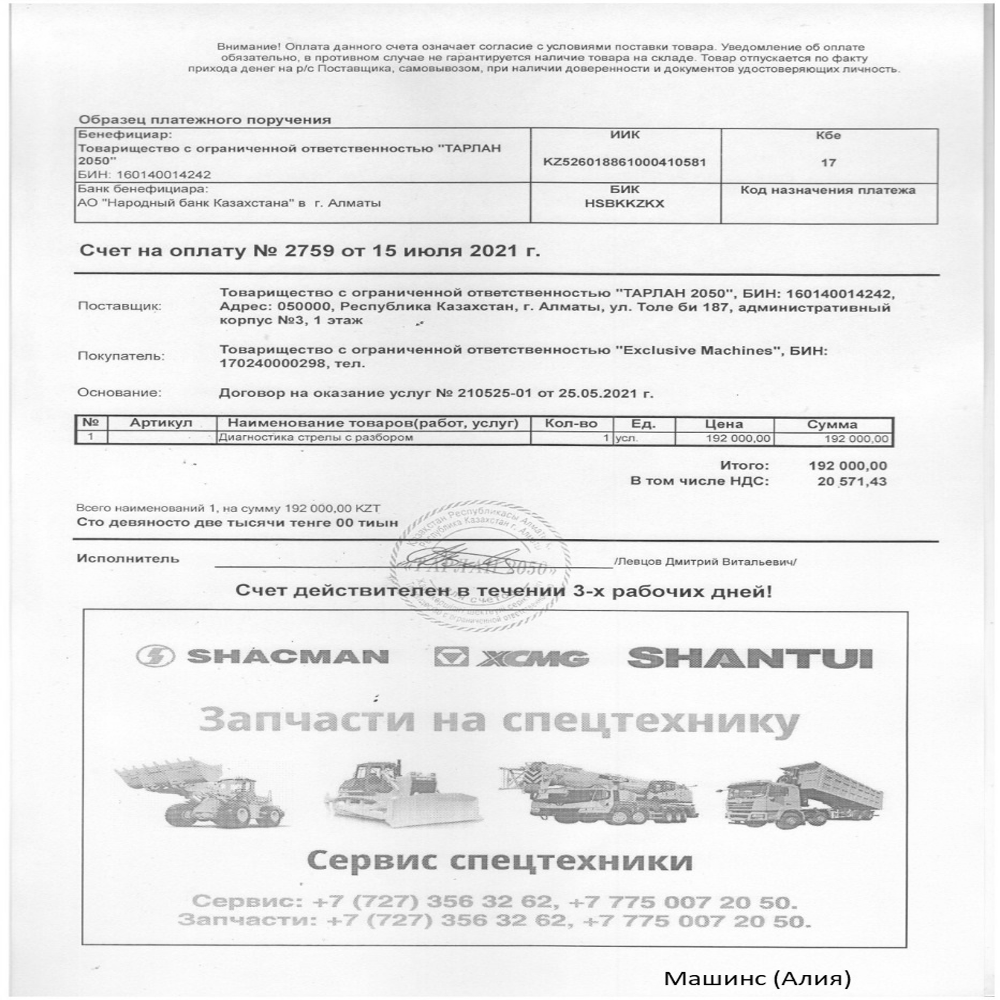

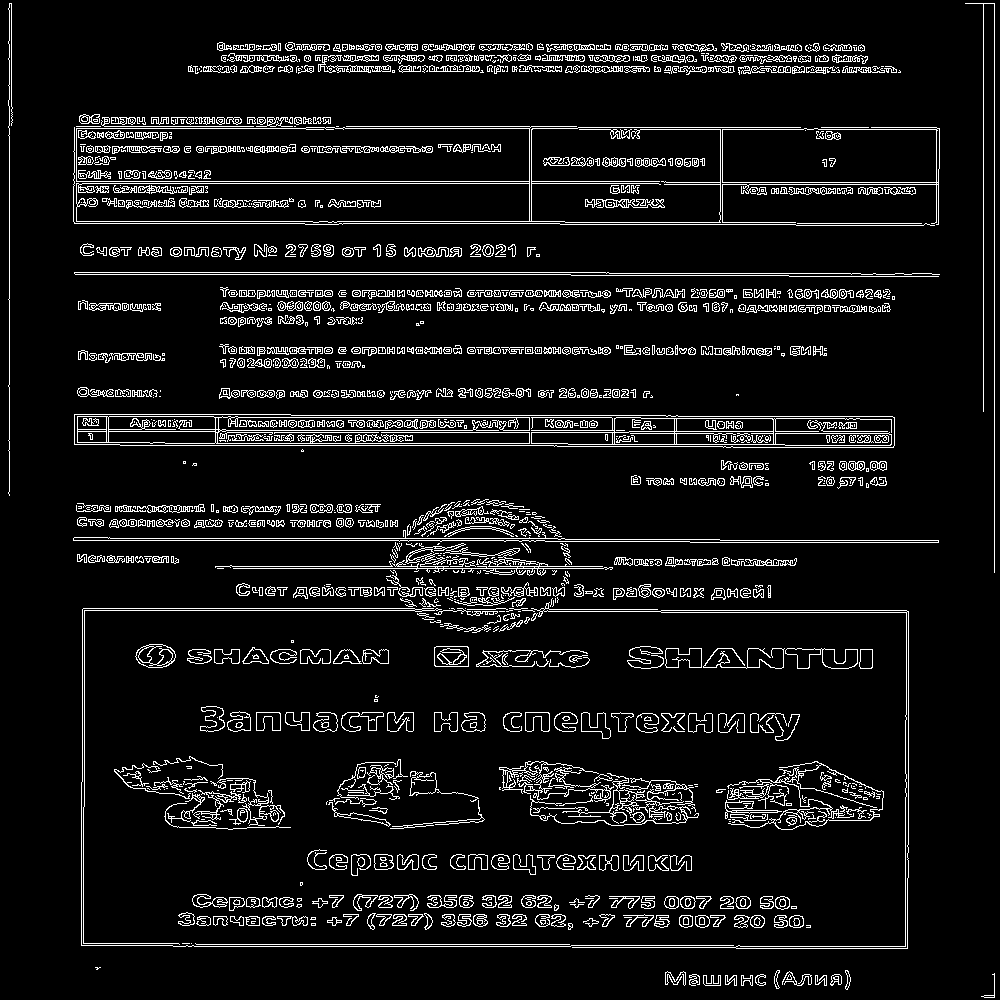

In [106]:
# чтение изображения из файла
image = cv2.imread('/content/img/001.jpeg/5900.png')

# меняем размер
img = cv2.resize(image,(1000, 1000))

# вывод на экран
cv2_imshow(img)

# поиск контуров
dst_img = cv2.Canny(img, 50, 200, None, 3)

# вывод на экран
cv2_imshow(dst_img)

In [107]:
# поиск линий
linesP = cv2.HoughLinesP(image = dst_img,
                         rho = 1,
                         theta = np.pi / 180,
                         threshold = 50,
                         minLineLength = 0,
                         maxLineGap = 0)

linesP

array([[[531, 181, 659, 181]],

       [[ 73, 540, 398, 540]],

       [[194, 946, 570, 946]],

       ...,

       [[199, 175, 201, 175]],

       [[444, 900, 444, 900]],

       [[301, 899, 301, 899]]], dtype=int32)

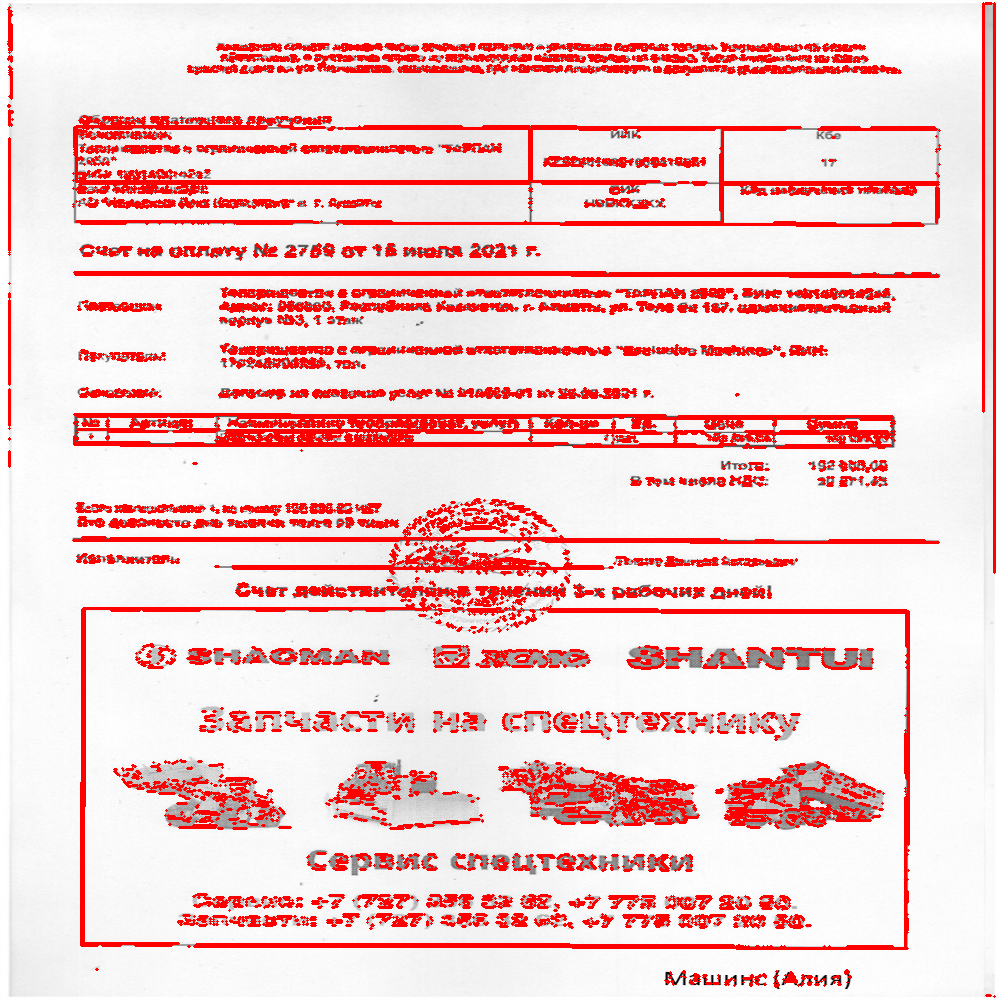

In [108]:
# отрисовка линий на изображении
for i in range(0, len(linesP)):
  lin = linesP[i][0]
  cv2.line(img = img,
           pt1 = (lin[0], lin[1]),
           pt2 = (lin[2], lin[3]),
           color=(0,0,255),
           thickness = 2)

# вывод на экран
cv2_imshow(img)

# **Обработка изображения с помощью CLAHE**

In [110]:
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/img/001.jpeg/5900.png', cv2.IMREAD_GRAYSCALE)

# Display the image
cv2_imshow(image)


# Создание объекта CLAHE с настройками
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Применение алгоритма CLAHE к изображению
enhanced_image = clahe.apply(image)

# Отображение исходного и обработанного изображений
cv2.imshow('Original Image', image)
cv2.imshow('Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# **Cпособ поворота при помощи функции cv2.getRotationMatrix2D()**

In [111]:
# чтение изображения из файла
image = cv2.imread('/content/img/001.jpeg/5900.png', cv2.IMREAD_COLOR)

# ширина и высота изображения
(rows, cols) = image.shape[:2]

# задаем параметры поворота для матрицы преобразований
param = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)

# выполняем поворот на основе параметров
rotated_image = cv2.warpAffine(src=image,          # изображение (массив numpy)
                               M=param,            # матрица преобразований
                               dsize=(cols, rows)) # размер выходного изображения

# вывод на экран
cv2_imshow(rotated_image)

Output hidden; open in https://colab.research.google.com to view.